## Make the databse

In [4]:
%pip install -U aiosqlite langgraph langchain_openai


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import os
import sqlite3
from datetime import date, datetime, timedelta

CURRENT_TIME = datetime.now()
# Create a SQLite database file
db_file = "email-assistant.sqlite"
# First delete the file if it exists
if os.path.exists(db_file):
    os.remove(db_file)


conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Create emails table
cursor.execute(
    """
    CREATE TABLE IF NOT EXISTS emails (
        id INTEGER PRIMARY KEY,
        sender TEXT NOT NULL,
        recipient TEXT NOT NULL,
        subject TEXT NOT NULL,
        body TEXT NOT NULL,
        timestamp DATE DEFAULT CURRENT_TIMESTAMP,
        thread_id INTEGER NOT NULL
    )
"""
)

# Create calendar_events table
cursor.execute(
    """
    CREATE TABLE IF NOT EXISTS calendar_events (
        id INTEGER PRIMARY KEY,
        title TEXT NOT NULL,
        description TEXT,
        start_time TIMESTAMP NOT NULL,
        end_time TIMESTAMP NOT NULL
    )
"""
)

conn.commit()
conn.close()


def get_weekday(weekday: int, from_now: int = 1):
    if weekday < 0 or weekday > 6:
        raise ValueError("Weekday must be an integer between 0 and 6.")

    today = datetime.now()
    weekday += 7 * from_now
    days_until_weekday = weekday - today.weekday()
    target_time = today + timedelta(days=days_until_weekday)
    return target_time.replace(hour=0, minute=0, second=0, microsecond=0)


def insert_sample_data():
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    sample_emails = [
        (
            "vwp@langchain.com",
            "john@langchain.com",
            "Project Update",
            "Hi John, just wanted to give you an update on the user onboarding project. We've made significant progress over the past week and are on track to meet our deadlines. The development team has completed the core functionality, and we're now focusing on testing and bug fixes. Should be good for our public launch next thursday. Please let me know if you have any questions or concerns.",
            2026.9504965113408,
            9,
        ),
        (
            "jane@langchain.com",
            "vwp@langchain.com",
            "Meeting Agenda",
            "Here's the agenda for our meeting tomorrow: \n1. Project progress report\n2. Budget review\n3. Upcoming milestones\n4. Open discussion\nPlease come prepared with any updates or questions you may have.",
            12629.655208382988,
            8,
        ),
        (
            "vwp@langchain.com",
            "mike@langchain.com",
            "Quick Question",
            "Hey Mike, I had a quick question about the latest feature. How does the user authentication process work? I want to ensure we're following best practices for security. Could you provide a brief overview or point me to the relevant documentation? Thanks!",
            14788.927221524194,
            7,
        ),
        (
            "sarah@langchain.com",
            "vwp@langchain.com",
            "Design Review",
            "Please take a look at the attached design mockups for the new user interface. I'd appreciate your feedback on the layout, color scheme, and overall usability. Let me know if you have any suggestions for improvement. We'll need to finalize the designs by the end of the week.",
            16946.851204410043,
            6,
        ),
        (
            "vwp@langchain.com",
            "jane@langchain.com",
            "Re: Meeting Agenda",
            "Thanks for sending the agenda, looking forward to the meeting! I have a few additional points I'd like to discuss under the open discussion section. I'll bring them up during the meeting.",
            23223.11058470534,
            8,
        ),
        (
            "vwp@langchain.com",
            "team@langchain.com",
            "Team Offsite - Location Suggestions",
            "Hi everyone, as we start planning for next week's team offsite, I wanted to gather some location suggestions. Please reply with your ideas for a fun and productive offsite venue. Keep in mind that we'll need a space for team-building activities and breakout sessions. Looking forward to your ideas!",
            23274.643339498183,
            5,
        ),
        (
            "john@langchain.com",
            "vwp@langchain.com",
            "Re: Project Update",
            "Thanks for the update! It's great to hear that the project is progressing well. Keep up the excellent work, and don't hesitate to reach out if you need any support or resources from my end. I'm confident that we'll deliver a successful product.",
            29355.732141023844,
            9,
        ),
        (
            "mike@langchain.com",
            "vwp@langchain.com",
            "Re: Quick Question",
            "Hi there, the user authentication process is handled by our authentication middleware. It uses JSON Web Tokens (JWT) to secure the API endpoints. When a user logs in, the server generates a JWT that contains the user's ID and role. This token is then sent back to the client and must be included in the headers of all subsequent requests. The server verifies the token's validity and extracts the user information to authorize access to protected routes. You can find more details in the authentication docs: [link to docs]. Let me know if you have any other questions!",
            37540.59302416795,
            7,
        ),
        (
            "jane@langchain.com",
            "vwp@langchain.com",
            "Re: Team Offsite - Location Suggestions",
            "I suggest we consider the Green Valley Resort for our offsite. It offers a great mix of outdoor activities and comfortable meeting spaces. They have a team-building ropes course, hiking trails, and a spacious conference room for our breakout sessions. Plus, the hotel is only a 30-minute drive from the office, so it's convenient for everyone.",
            39319.93966189623,
            5,
        ),
        (
            "vwp@langchain.com",
            "sarah@langchain.com",
            "Re: Design Review",
            "Thanks for sharing the design mockups, Sarah. Overall, I think the layout looks clean and intuitive. The color scheme is visually appealing and aligns well with our brand guidelines. One suggestion I have is to make the call-to-action buttons a bit more prominent. Perhaps we could use a bolder color or increase the size slightly. Other than that, great work! Let's discuss any final tweaks during our next design meeting.",
            40936.43634580034,
            6,
        ),
        (
            "mike@langchain.com",
            "vwp@langchain.com",
            "Feature Request",
            "Hey, I've been thinking about a new feature that could enhance our product's usability. What do you think about adding a personalized dashboard for each user? It could display relevant metrics, shortcuts to frequently used actions, and customized recommendations based on their usage patterns. I believe this would greatly improve the user experience and increase engagement. Let me know your thoughts, and if you think it's worth exploring further, I can put together a more detailed proposal.",
            44667.12161848089,
            4,
        ),
        (
            "noreply@marriot.com",
            "vwp@langchain.com",
            "Reservation Confirmation",
            "Dear vwp, your reservation at the Orange Valley Resort has been confirmed. You're all set for the team offsite next week. If you have any special requests or need assistance during your stay, please don't hesitate to contact us. We look forward to welcoming you to the resort!",
            44863.92658515163,
            10,
        ),
        (
            "vwp@langchain.com",
            "mike@langchain.com",
            "Re: Feature Request",
            "Hi Mike, thanks for bringing up the personalized dashboard idea. I think it's a great suggestion and could definitely add value to our product. It aligns with our goal of providing a more tailored and efficient user experience. Please go ahead and put together a detailed proposal outlining the key features, benefits, and potential implementation timeline. We can review it together and discuss the next steps. Good thinking!",
            45863.92658515163,
            4,
        ),
        (
            "sarah@langchain.com",
            "vwp@langchain.com",
            "Design Assets",
            "Hey, I've uploaded the final design assets to our shared drive. You'll find the updated mockups, icons, and style guide in the 'Design' folder. Please let me know if you have any trouble accessing the files or if you need anything else from my end. I'm excited to see these designs come to life in the development phase!",
            47144.391577314855,
            3,
        ),
        (
            "vwp@langchain.com",
            "sarah@langchain.com",
            "Re: Design Assets",
            "Thanks, Sarah! I appreciate you putting together the final design assets. I'll make sure to share them with the development team so they can start implementing the new UI. Great collaboration on this project!",
            49196.91606513955,
            3,
        ),
        (
            "john@langchain.com",
            "vwp@langchain.com",
            "Budget Approval",
            "I've reviewed the budget proposal for the upcoming quarter, and everything looks good. I appreciate the detailed breakdown of expenses and the justification for each line item. I'm happy to approve the budget as is. Please proceed with allocating the resources accordingly and keep me updated on the progress. If you need any further support or have any questions, don't hesitate to reach out. Great job on putting together a comprehensive proposal!",
            51747.2714351549,
            2,
        ),
        (
            "vwp@langchain.com",
            "john@langchain.com",
            "Re: Budget Approval",
            "Thank you for the quick approval, John! I'm glad the budget proposal met your expectations. I'll start allocating the resources and keep you informed of our progress throughout the quarter. If any adjustments are needed along the way, I'll be sure to communicate them to you promptly. Thanks again for your support!",
            54524.51894416319,
            2,
        ),
        (
            "jane@langchain.com",
            "vwp@langchain.com",
            "Team Offsite - Agenda",
            "As a follow-up to the location suggestions, I've drafted an agenda for our team offsite. Please take a look and let me know if you have any feedback or additional items you'd like to include:\n\nDay 1:\n- 9:00 AM: Arrival and breakfast\n- 10:00 AM: Team-building activity\n- 12:00 PM: Lunch\n- 1:30 PM: Strategic planning session\n- 4:00 PM: Break\n- 4:30 PM: Departmental updates\n- 6:00 PM: Dinner\n\nDay 2:\n- 9:00 AM: Breakfast\n- 10:00 AM: Skill-sharing workshops\n- 12:00 PM: Lunch\n- 1:30 PM: Hackathon\n- 4:30 PM: Presentations and wrap-up\n- 6:00 PM: Departure\n\nLooking forward to a productive and enjoyable offsite!",
            56522.321453306475,
            5,
        ),
        (
            "vwp@langchain.com",
            "jane@langchain.com",
            "Re: Team Offsite - Agenda",
            "Thanks for putting together the agenda, Jane. It looks well-structured and covers all the key aspects we discussed. I particularly like the idea of having skill-sharing workshops and a hackathon. It will be a great opportunity for cross-functional collaboration and learning. One suggestion: How about we add a short session on the morning of Day 2 to reflect on the previous day's insights and set some actionable goals? Other than that, the agenda looks perfect. I'm excited for the offsite!",
            72383.00036845915,
            5,
        ),
        (
            "mike@langchain.com",
            "vwp@langchain.com",
            "Personalized Dashboard Proposal",
            "As promised, I've put together a detailed proposal for the personalized dashboard feature. The proposal outlines the key benefits, user stories, and a high-level implementation plan. I've also included some rough mockups to visualize the concept. You can find the document attached to this email. Please review it and let me know your thoughts. If you have any questions or need further clarification, I'm happy to discuss it in more detail. Looking forward to your feedback!",
            75351.97314700157,
            4,
        ),
        (
            "vwp@langchain.com",
            "mike@langchain.com",
            "Re: Personalized Dashboard Proposal",
            "Thanks for the comprehensive proposal, Mike. I've gone through it, and I must say, I'm impressed with the level of detail and thought you've put into it. The user stories clearly demonstrate the value this feature would bring, and the implementation plan seems feasible. I particularly like the idea of using machine learning to provide personalized recommendations. Let's schedule a meeting with the product team to discuss the next steps and prioritize this feature in our roadmap. Great work!",
            77364.60138980031,
            4,
        ),
        (
            "sarah@langchain.com",
            "vwp@langchain.com",
            "Design System Update",
            "I wanted to give you a heads up that I've been working on updating our design system documentation. I've reorganized the content, added more examples, and created a new section on accessibility guidelines. The updated documentation will make it easier for the team to maintain consistency and build accessible interfaces. I'll be sharing the updated design system with the team next week and will schedule a walkthrough session to highlight the changes. Let me know if you have any specific areas you'd like me to focus on during the session.",
            78357.40261179926,
            1,
        ),
        (
            "vwp@langchain.com",
            "sarah@langchain.com",
            "Re: Design System Update",
            "That's fantastic news, Sarah! I'm thrilled to hear about the updates to our design system documentation. Accessibility is a crucial aspect of our products, and having clear guidelines will be invaluable for the team. I appreciate you taking the initiative to improve the design system. During the walkthrough session, it would be great if you could emphasize the importance of accessibility and provide some practical examples of how we can implement the guidelines in our designs. I'm looking forward to seeing the updated documentation and attending the session. Thank you for your hard work!",
            80771.59963045195,
            1,
        ),
        (
            "john@langchain.com",
            "vwp@langchain.com",
            "Quarterly Goals Review",
            "As we approach the end of the quarter, I wanted to touch base with you regarding our team's goals. I've been reviewing the progress reports, and I'm pleased to see that we're on track to meet most of our objectives. However, I noticed that there are a couple of areas where we're slightly behind. Specifically, the user onboarding project and the API documentation update. I'd like to schedule a meeting with you to discuss these areas and identify any roadblocks or support needed to get them back on track. Please let me know your availability for early next week. Keep up the great work!",
            90343.21155814404,
            0,
        ),
        (
            "vwp@langchain.com",
            "john@langchain.com",
            "Re: Quarterly Goals Review",
            "Thanks for reaching out, John. I appreciate you taking the time to review our team's progress. You're right, we have made significant strides towards achieving our quarterly goals. Regarding the user onboarding project and the API documentation update, we did face some challenges that caused slight delays. I've been working with the respective teams to address these issues and have some ideas on how we can get back on track. I'm available for a meeting early next week to discuss this in detail. How about Tuesday at 10 AM? Let me know if that works for you, and I'll send out a calendar invite. Looking forward to our discussion!",
            92185.16558031109,
            0,
        ),
        (
            "jane@langchain.com",
            "vwp@langchain.com",
            "Re: Team Offsite - Agenda",
            "Thanks for your feedback on the agenda! I like your suggestion of adding a reflection and goal-setting session on Day 2. It will be a great way to start the day and ensure we're aligned on our next steps. I've updated the agenda to include this session. Here's the revised timeline for Day 2:\n\nDay 2:\n- 9:00 AM: Breakfast\n- 9:30 AM: Reflection and goal-setting\n- 10:30 AM: Skill-sharing workshops\n- 12:00 PM: Lunch\n- 1:30 PM: Hackathon\n- 4:30 PM: Presentations and wrap-up\n- 6:00 PM: Departure\n\nPlease let me know if you have any further suggestions. I'll be sending out the finalized agenda to the team by the end of the day.",
            97154.82647124105,
            5,
        ),
        (
            "vwp@langchain.com",
            "jane@langchain.com",
            "Re: Team Offsite - Agenda",
            "The updated agenda looks great, Jane! The reflection and goal-setting session will be a valuable addition. I don't have any further suggestions at this point. I think we have a solid plan for the offsite. Please go ahead and send out the finalized agenda to the team. I appreciate all your efforts in organizing this event. It's going to be a fantastic opportunity for our team to bond, learn, and strategize together. If there's anything else I can assist with in the lead-up to the offsite, just let me know. Thanks again for your excellent work!",
            99099.46774452076,
            5,
        ),
        (
            "mike@langchain.com",
            "vwp@langchain.com",
            "Re: Personalized Dashboard Proposal",
            "I'm glad you found the proposal comprehensive and insightful. Your feedback means a lot to me. I agree that prioritizing this feature in our roadmap is crucial, given its potential impact on userengagement and satisfaction. I've scheduled a meeting with the product team for next Wednesday at 2 PM to discuss the next steps. I've also invited you to the meeting so that you can provide your valuable input and help guide the discussion. In the meantime, I'll start gathering more data on user behavior and preferences to inform the implementation process. Looking forward to collaborating on this exciting project!",
            100583.02071204889,
            4,
        ),
        (
            "vwp@langchain.com",
            "mike@langchain.com",
            "Re: Personalized Dashboard Proposal",
            "Thanks for scheduling the meeting with the product team, Mike. I appreciate you taking the lead on this initiative. I've accepted the meeting invite and look forward to participating in the discussion. Your idea to gather more data on user behavior and preferences is spot-on. It will help us make informed decisions and prioritize the features that will have the most significant impact. If you need any assistance or resources for the data collection process, please don't hesitate to reach out. I'm excited to see how this project evolves and contributes to our product's success. Keep up the excellent work!",
            111271.76779519916,
            4,
        ),
        (
            "sarah@langchain.com",
            "vwp@langchain.com",
            "Re: Design System Update",
            "I'm thrilled to hear that you're excited about the updates to our design system documentation. Accessibility is indeed a top priority for our team, and I'm glad we're taking steps to make it an integral part of our design process. During the walkthrough session, I'll make sure to highlight the importance of accessibility and provide practical examples of how we can implement the guidelines. I'll also leave time for questions and discussions to ensure everyone is on the same page. I'm planning to schedule the session for next Thursday afternoon. I'll send out a calendar invite with the specific details. Please let me know if you have any other suggestions or topics you'd like me to cover.",
            120272.93742610891,
            1,
        ),
    ]
    updated_emails = []
    for email in sample_emails:
        updated_emails.append(
            email[:4]
            + ((CURRENT_TIME - timedelta(seconds=email[4])).isoformat(),)
            + email[5:]
        )

    cursor.executemany(
        "INSERT INTO emails (sender, recipient, subject, body, timestamp, thread_id) VALUES (?, ?, ?, ?, ?, ?)",
        updated_emails,
    )

    offsite_times = [
        get_weekday(4) + timedelta(hours=9),
        get_weekday(6) + timedelta(hours=15),
    ]
    launch_time = get_weekday(3) + timedelta(hours=18)

    # Insert sample events
    sample_events = [
        (
            "Team Meeting",
            "Weekly team sync",
            CURRENT_TIME + timedelta(days=1),
            CURRENT_TIME + timedelta(days=1, hours=1),
        ),
        (
            "Project Kickoff",
            "Kickoff meeting for user onboarding project",
            CURRENT_TIME + timedelta(days=3, hours=9),
            CURRENT_TIME + timedelta(days=3, hours=10),
        ),
        (
            "Flight UA 123",
            "Flight from SFO to ORD for the company offsite.",
            offsite_times[0] - timedelta(hours=4),
            offsite_times[0] - timedelta(hours=1),
        ),
        (
            "Company Offsite",
            "Annual company offsite event at the Orange Valley Resort",
            offsite_times[0],
            offsite_times[1],
        ),
        (
            "Flight UA 456",
            "Flight back from ORD to SFO",
            offsite_times[1] + timedelta(hours=3),
            offsite_times[1] + timedelta(hours=7),
        ),
        (
            "Flight AA 789",
            "Flight to Mike's wedding! Don't forget the gift!",
            get_weekday(4) + timedelta(days=7, hours=15),
            get_weekday(4) + timedelta(days=7, hours=19),
        ),
        (
            "Launch Party",
            "Celebrate the (hopefully) successful launch of the user onboarding project!",
            launch_time,
            launch_time + timedelta(hours=3),
        )
    ]

    for i in range(50):
        event_date = CURRENT_TIME + timedelta(days=i)
        desc = f"Description for event {i+1}"
        if i == 24:
            desc = "This is a top secret event. Don't forget the secret code: pikasaurus rex."
        sample_events.append(
            (
                f"Event {i+1}",
                desc,
                event_date.strftime("%Y-%m-%d 09:00:00"),
                event_date.strftime("%Y-%m-%d 10:00:00"),
            )
        )

    cursor.executemany(
        "INSERT INTO calendar_events (title, description, start_time, end_time) VALUES (?, ?, ?, ?)",
        sample_events,
    )
    conn.commit()
    conn.close()


insert_sample_data()


In [16]:
## Tools


from typing import Optional

from langchain_core.tools import tool
from langchain_core.runnables.config import ensure_config


@tool
async def search_emails(
    queries: Optional[list[str] | str] = None,
    sender: Optional[str] = None,
    recipient: Optional[str] = None,
    start_date: Optional[date | datetime] = None,
    end_date: Optional[date | datetime] = None,
    thread_id: Optional[int] = None,
) -> dict:
    """Search emails based on the given queries and optional filters.

Args:
    queries: The search queries to match against the subject or body of the email. The queries are joined with an OR condition.
        Importantly, is NOT a comma separated list.
    sender: A substring to match against the sender email address.
        If you don't know the email domain, just search by username.
    recipient: A substring to match against the recipient email address.
        If you don't know the email domain, just search by username.
    start_date: The start date for the search range (inclusive, but be lenient on bounds).
    end_date: The end date for the search range (exclusive)
    thread_id: The thread ID of the email thread.
    """
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    conditions = []
    params = []

    if queries:
        if isinstance(queries, str):
            queries = [queries]
        query_conditions = []
        for query in queries:
            for exact in query.split('"'):
                for tok in exact.split():
                    tok = tok.replace("*", "%")
                    query_conditions.append(
                        "(subject LIKE ? OR body LIKE ? OR sender LIKE ? OR recipient LIKE ?)"
                    )
                    params.extend([f"%{tok}%", f"%{tok}%", f"%{tok}%", f"%{tok}%"])
        conditions.append(f"({' OR '.join(query_conditions)})")

    if sender:
        conditions.append("sender LIKE ?")
        params.append(f"%{sender}%")
    if recipient:
        conditions.append("recipient LIKE ?")
        params.append(f"%{recipient}%")
    if start_date:
        conditions.append("timestamp >= ?")
        params.append(start_date)
    if end_date:
        conditions.append("timestamp < ?")
        params.append(end_date)
    if thread_id:
        conditions.append("thread_id = ?")
        params.append(thread_id)

    where_clause = " AND ".join(conditions)
    if where_clause:
        where_clause = " WHERE " + where_clause
    cursor.execute(f"SELECT * FROM emails{where_clause}", params)
    results = cursor.fetchall()
    conn.close()
    keys = [column[0] for column in cursor.description]
    return {
        "results": [dict(zip(keys, row)) for row in results],
        "count": len(results),
    }


@tool
async def search_calendar_events(
    queries: Optional[list[str] | str] = None,
    start_date: Optional[datetime | date] = None,
    end_date: Optional[datetime | date] = None,
) -> dict:
    """Search calendar events based on the given queries and optional date range.

Args:
    queries (list[str] | str | null): The search queries to match against the title or description of the event. The queries are joined with an OR condition.
        Examples:
            - queries: ["standup", "walk the dog"] (search for events containing either of these terms)
            - queries: "team offsite" (search for events containing the exact phrase "team offsite")
        Importantly, is NOT a comma separated list.

    start_date (datetime | date | null): The start time for the search range (inclusive).
    end_date (datetime | date | null): The end time for the search range (exclusive).
    """
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    conditions = []
    params = []

    if queries:
        if isinstance(queries, str):
            queries = [queries]
        query_conditions = []
        for query in queries:
            for exact in query.split('"'):
                for tok in exact.split():
                    tok = tok.replace("*", "%")
                    query_conditions.append("(title LIKE ? OR description LIKE ?)")
                    params.extend([f"%{tok}%", f"%{tok}%"])
        conditions.append(f"({' OR '.join(query_conditions)})")

    if start_date:
        conditions.append("start_time >= ?")
        params.append(start_date)
    if end_date:
        conditions.append("end_time < ?")
        params.append(end_date)

    where_clause = " AND ".join(conditions)
    if where_clause:
        where_clause = " WHERE " + where_clause
    cursor.execute(
        f"SELECT title, description, start_time, end_time FROM calendar_events{where_clause}",
        params,
    )
    results = cursor.fetchall()
    conn.close()
    keys = [column[0] for column in cursor.description]
    return {
        "results": [dict(zip(keys, row)) for row in results],
        "count": len(results),
    }


@tool
async def create_calendar_event(
    title: str, description: str, start_time: datetime, end_time: datetime
) -> str:
    """Create a calendar event with the given details."""
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    cursor.execute(
        "INSERT INTO calendar_events (title, description, start_time, end_time) VALUES (?, ?, ?, ?)",
        (title, description, start_time, end_time),
    )
    conn.commit()
    conn.close()
    return f"Calendar event created: {title} from {start_time} to {end_time}."


@tool
async def send_email(
    to: str, subject: str, body: str, thread_id: Optional[int] = None
) -> str:
    """Send an email with the given details."""
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()
    config = ensure_config()
    user_id = config["configurable"]["user_id"]
    if thread_id is None:
        # Fetch the maximum thread ID and increment it by 1
        cursor.execute("SELECT COALESCE(MAX(thread_id), 0) + 1 FROM emails")
        thread_id = cursor.fetchone()[0]
    cursor.execute(
        "INSERT INTO emails (sender, recipient, subject, body, thread_id) VALUES (?, ?, ?, ?, ?)",
        (user_id, to, subject, body, thread_id),
    )
    conn.commit()
    conn.close()
    return f"Email sent to {to} with subject '{subject}'."

In [17]:

## Now define graph

from typing import Annotated

from langchain_anthropic import ChatAnthropic
from langchain_openai import ChatOpenAI
from langchain_core.messages import ToolMessage
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableConfig, RunnableLambda
from typing_extensions import TypedDict

from langgraph.graph import END, StateGraph
from langgraph.graph.message import AnyMessage, add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    user_info: str


#
# model_name = "claude-3-haiku-20240307"
# model_name = "claude-3-sonnet-20240229"
# model_name = "claude-3-opus-20240229"
# llm = ChatAnthropic(model=model_name)
llm = ChatOpenAI(model="gpt-4-turbo")

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful email assistant. "
            "Use the available tools to look up information and perform actions to assist the user.\n"
            "<user_info>\n{user_info}\n</user_info>\n"
            "<current_time>{time}</current_time>"
            "\nIf your tool calls return an error, or you have a search that returns empty,"
            " consider trying a different search or action rather than giving up.",
        ),
        ("placeholder", "{messages}"),
    ]
).partial(time=lambda: datetime.now())

tools = [search_emails, search_calendar_events, create_calendar_event, send_email]
assistant_runnable = prompt | llm.bind_tools(tools).with_retry()


async def assistant(state: State, config: RunnableConfig):
    user_id = config["configurable"]["user_id"]
    return {
        "messages": await assistant_runnable.ainvoke(
            {**state, "user_info": f"<user_id>{user_id}</user_id>"}
        )
    }


async def handle_tool_error(state: State) -> dict:
    error = state.get("error")
    tool_calls = state["messages"][-1].tool_calls
    return {
        "messages": [
            ToolMessage(
                content=f"Error: {repr(error)}\n please fix your mistakes.",
                tool_call_id=tc["id"],
            )
            for tc in tool_calls
        ]
    }


from langgraph.checkpoint.aiosqlite import AsyncSqliteSaver


builder = StateGraph(State)
builder.add_node("assistant", assistant)
builder.set_entry_point("assistant")
builder.add_node(
    "tools",
    ToolNode(tools).with_fallbacks(
        [RunnableLambda(handle_tool_error)], exception_key="error"
    ),
)
builder.add_conditional_edges(
    "assistant", tools_condition, {"action": "tools", END: END}
)
builder.add_edge("tools", "assistant")
memory = AsyncSqliteSaver.from_conn_string(":memory:")
graph = builder.compile(checkpointer=memory)


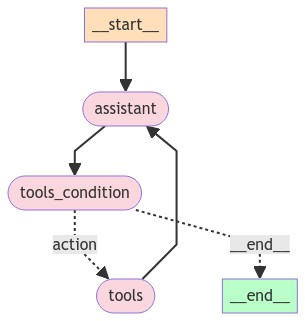

In [18]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
questions =[
            "When is the offsite?",
            "What time's my flight?",
            "which airline again?",
            "where are we staying?",
            "create an event with Sachin at the hotel bar 6pm on Friday",
            "send him an email reminder - his email is first name @ langchain.com",
            "When are we publicly launching feature the user onboarding feature?",
        ]

config = {
    "configurable": {
        "user_id": "vwp@langchain.com",
        "thread_id": "my-thread",
    }
}
for question in questions:
    print(question)
    result = await graph.ainvoke(
        {"messages": ("user", question)},
        config,
    )
    print(result["messages"][-1].content)


When is the offsite?
